In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,8,Emilia-Romagna,2255,227,2482,40196,42678,2007,2610,...,22.0,24606.0,7404.0,1917.0,9.15,5.82,10.61,35.25,6.07,4.93
370,2021-03-01T17:00:00,8,Emilia-Romagna,2375,236,2611,41667,44278,1600,2597,...,23.0,12463.0,3788.0,1471.0,9.04,5.90,20.84,68.56,3.96,3.75
371,2021-03-02T17:00:00,8,Emilia-Romagna,2476,239,2715,43132,45847,1569,2040,...,44.0,40971.0,5741.0,1465.0,8.80,5.92,4.98,35.53,1.27,3.54
372,2021-03-03T17:00:00,8,Emilia-Romagna,2528,251,2779,43919,46698,851,2456,...,40.0,40815.0,7352.0,787.0,9.03,5.95,6.02,33.41,5.02,1.86


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2545
Nuovi tamponi: 38231.0
Percentuale nuovi positivi/nuovi tamponi: 7.000000000000001 %
Nuovi guariti: 1070.0
Nuovi deceduti: 25.0
Variazione positivi ricoverati con sintomi: 72.0
Variazione positivi in terapia intensiva: 8.0
Variazione positivi in isolamento dimiciliare: 1350.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,8,Emilia-Romagna,2657,234,2891,53737,56628,-1878,1818,...,41.0,14387.0,5206.0,-1891.0,8.09,5.11,12.64,34.92,2.18,-3.21
1,2021-01-04T17:00:00,8,Emilia-Romagna,2684,235,2919,53466,56385,-243,1600,...,54.0,9133.0,2873.0,-271.0,8.05,5.18,17.52,55.69,0.43,-0.43
2,2021-01-05T17:00:00,8,Emilia-Romagna,2696,232,2928,54249,57177,792,1506,...,64.0,15795.0,3513.0,783.0,7.92,5.12,9.53,42.87,-1.28,1.40
3,2021-01-06T17:00:00,8,Emilia-Romagna,2665,236,2901,55168,58069,892,1576,...,61.0,16527.0,5912.0,919.0,8.14,5.00,9.54,26.66,1.72,1.56
4,2021-01-07T17:00:00,8,Emilia-Romagna,2701,240,2941,53944,56885,-1184,2228,...,64.0,9629.0,4147.0,-1224.0,8.16,5.17,23.14,53.73,1.69,-2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,8,Emilia-Romagna,2255,227,2482,40196,42678,2007,2610,...,22.0,24606.0,7404.0,1917.0,9.15,5.82,10.61,35.25,6.07,4.93
57,2021-03-01T17:00:00,8,Emilia-Romagna,2375,236,2611,41667,44278,1600,2597,...,23.0,12463.0,3788.0,1471.0,9.04,5.90,20.84,68.56,3.96,3.75
58,2021-03-02T17:00:00,8,Emilia-Romagna,2476,239,2715,43132,45847,1569,2040,...,44.0,40971.0,5741.0,1465.0,8.80,5.92,4.98,35.53,1.27,3.54
59,2021-03-03T17:00:00,8,Emilia-Romagna,2528,251,2779,43919,46698,851,2456,...,40.0,40815.0,7352.0,787.0,9.03,5.95,6.02,33.41,5.02,1.86


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

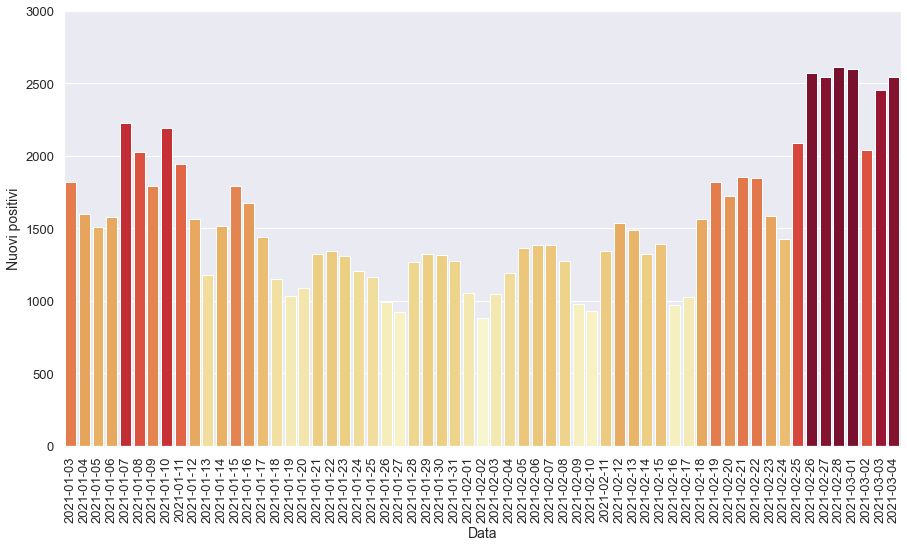

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

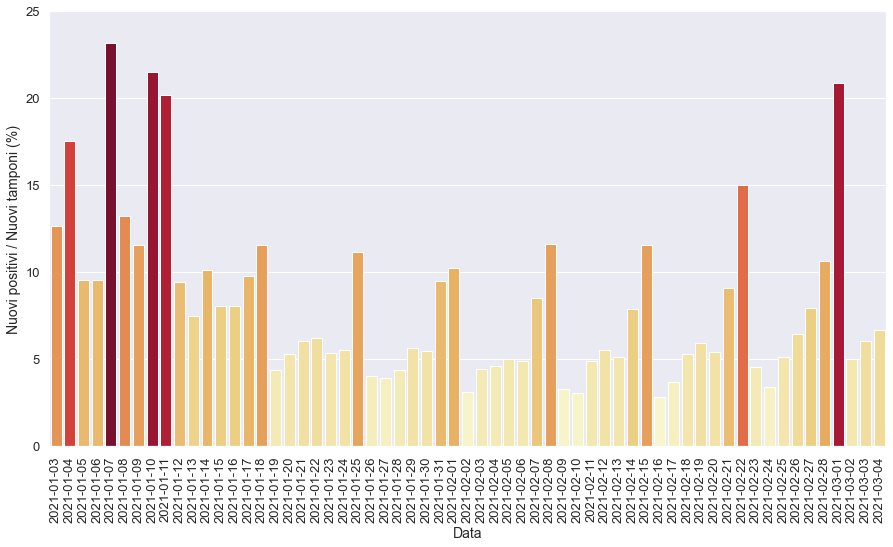

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

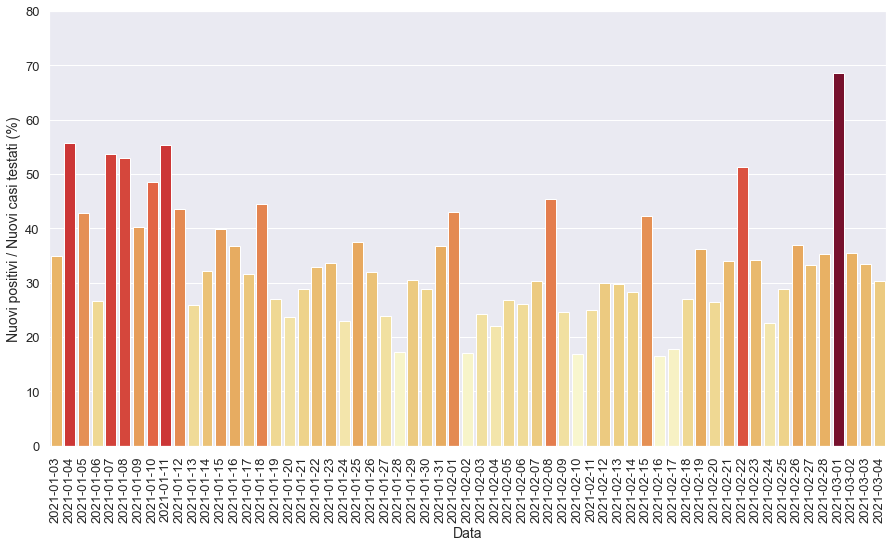

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

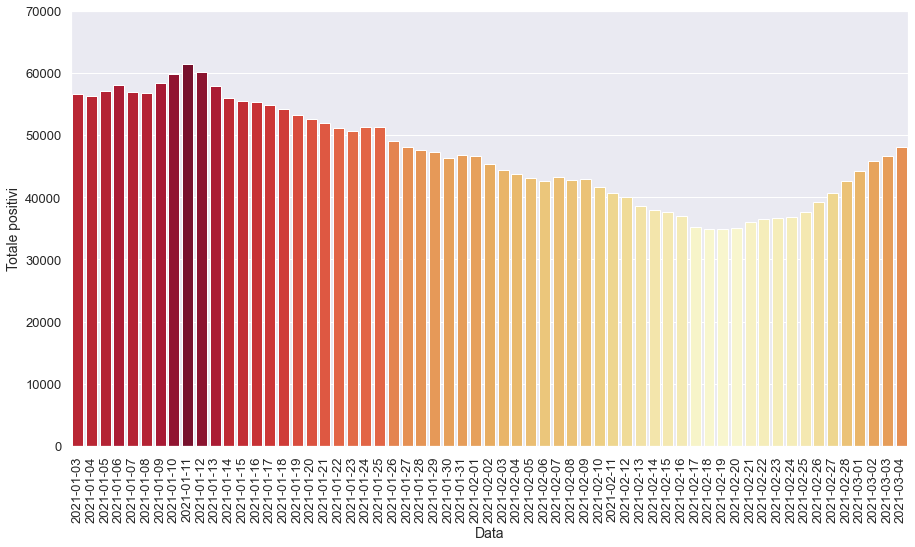

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

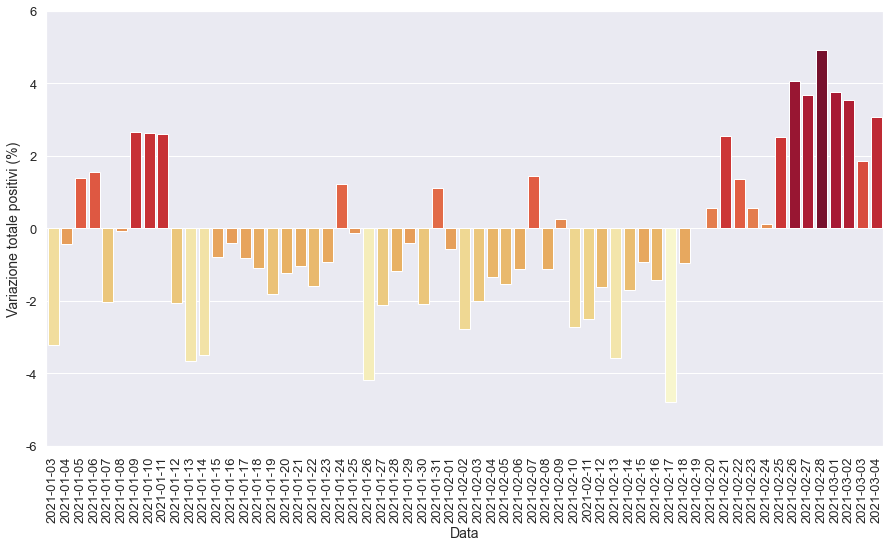

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

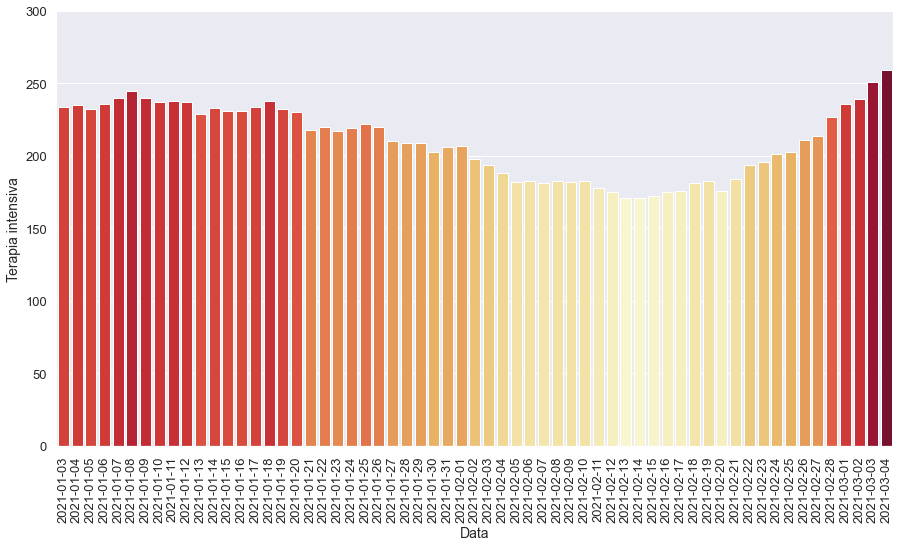

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

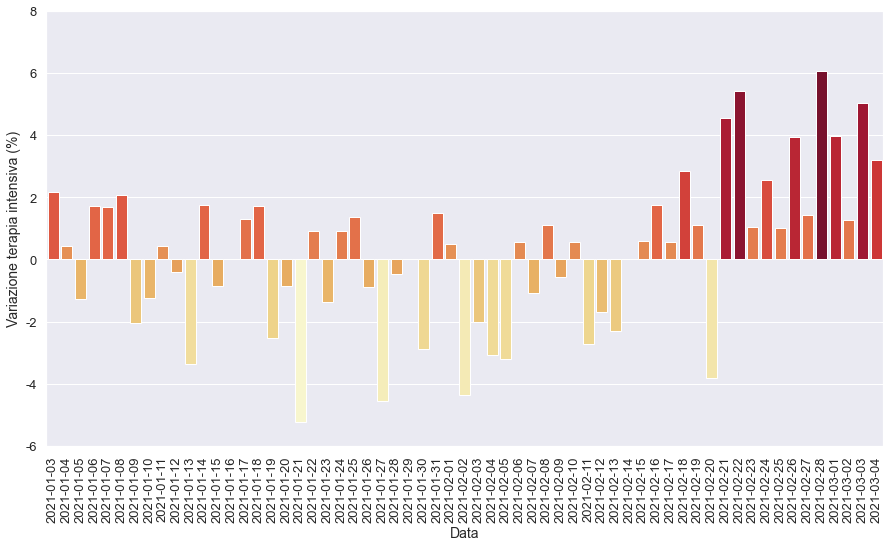

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

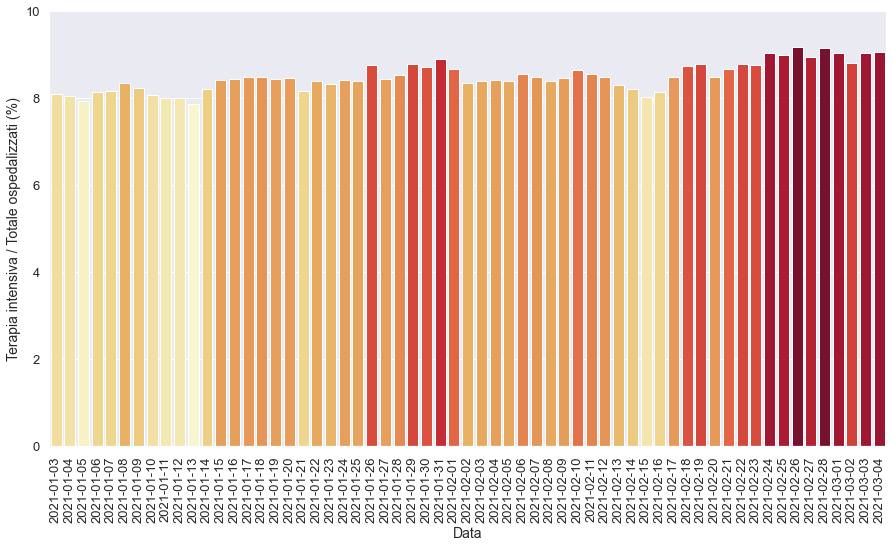

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

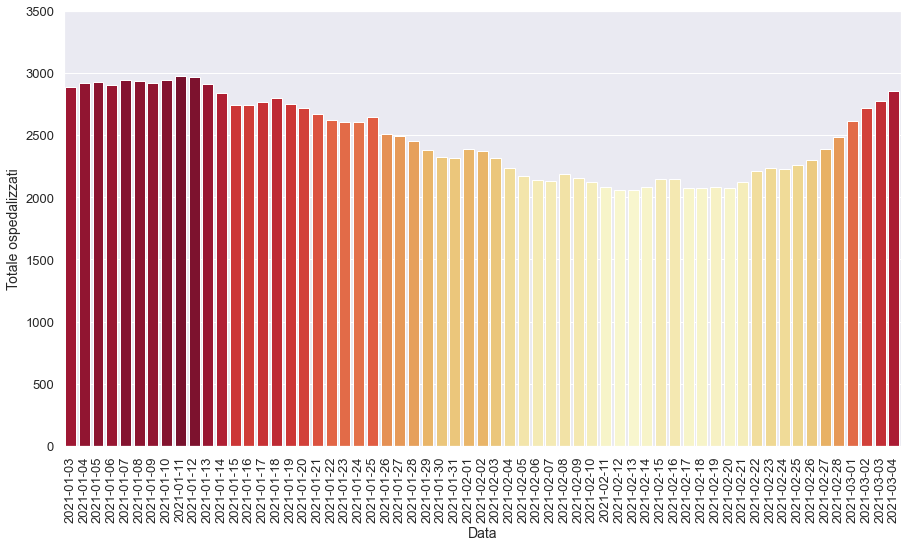

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

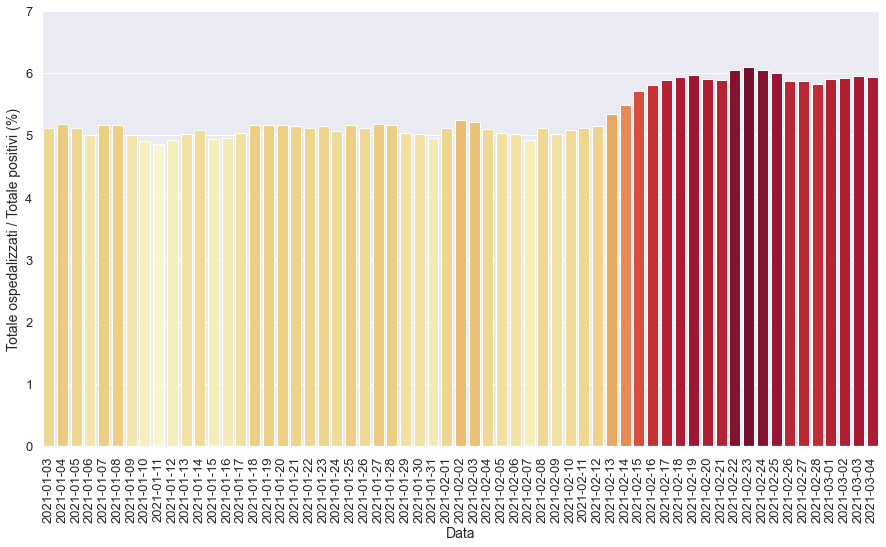

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

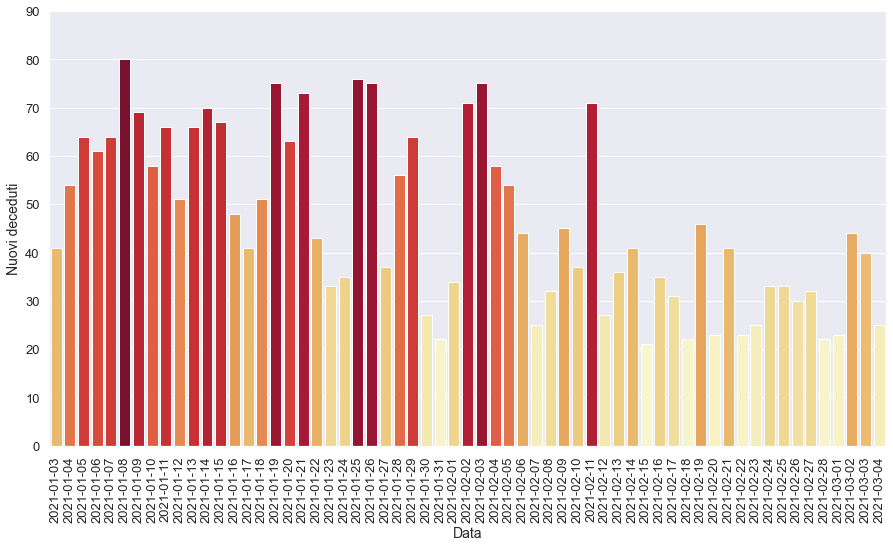

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

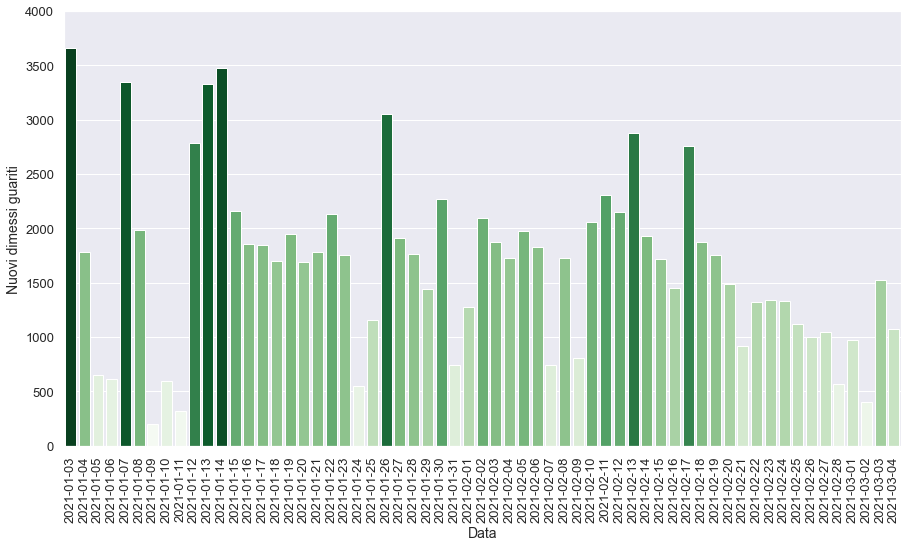

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,8,Emilia-Romagna,2176,198,2374,42938,45312,-1295,879,...,71.0,28432.0,5133.0,-1281.0,8.34,5.24,3.09,17.12,-4.35,-2.78
1,2021-02-03T17:00:00,8,Emilia-Romagna,2122,194,2316,42086,44402,-910,1047,...,75.0,23806.0,4326.0,-852.0,8.38,5.22,4.40,24.20,-2.02,-2.01
2,2021-02-04T17:00:00,8,Emilia-Romagna,2046,188,2234,41575,43809,-593,1192,...,58.0,25882.0,5390.0,-511.0,8.42,5.10,4.61,22.12,-3.09,-1.34
3,2021-02-05T17:00:00,8,Emilia-Romagna,1990,182,2172,40964,43136,-673,1364,...,54.0,27354.0,5103.0,-611.0,8.38,5.04,4.99,26.73,-3.19,-1.54
4,2021-02-06T17:00:00,8,Emilia-Romagna,1956,183,2139,40509,42648,-488,1383,...,44.0,28396.0,5303.0,-455.0,8.56,5.02,4.87,26.08,0.55,-1.13
5,2021-02-07T17:00:00,8,Emilia-Romagna,1950,181,2131,41130,43261,613,1382,...,25.0,16215.0,4570.0,621.0,8.49,4.93,8.52,30.24,-1.09,1.44
6,2021-02-08T17:00:00,8,Emilia-Romagna,2002,183,2185,40588,42773,-488,1273,...,32.0,10990.0,2809.0,-542.0,8.38,5.11,11.58,45.32,1.10,-1.13
7,2021-02-09T17:00:00,8,Emilia-Romagna,1971,182,2153,40731,42884,111,977,...,45.0,29701.0,3957.0,143.0,8.45,5.02,3.29,24.69,-0.55,0.26
8,2021-02-10T17:00:00,8,Emilia-Romagna,1937,183,2120,39593,41713,-1171,930,...,37.0,30664.0,5502.0,-1138.0,8.63,5.08,3.03,16.90,0.55,-2.73
9,2021-02-11T17:00:00,8,Emilia-Romagna,1903,178,2081,38591,40672,-1041,1345,...,71.0,27703.0,5392.0,-1002.0,8.55,5.12,4.86,24.94,-2.73,-2.50


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

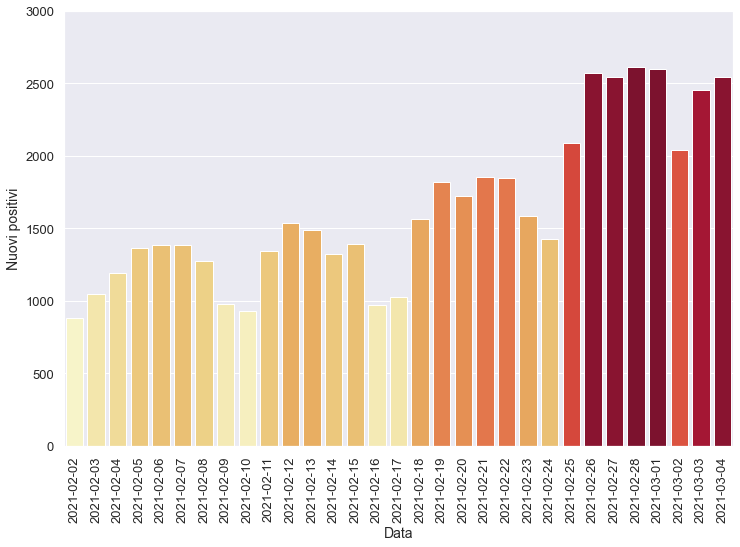

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

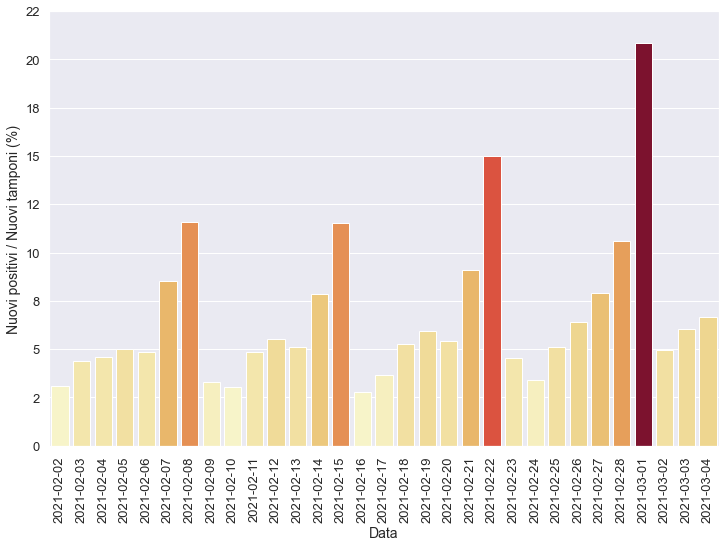

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

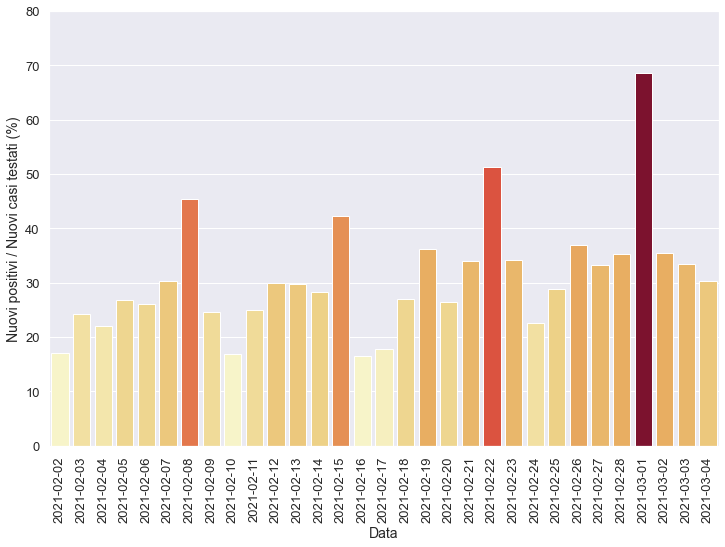

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

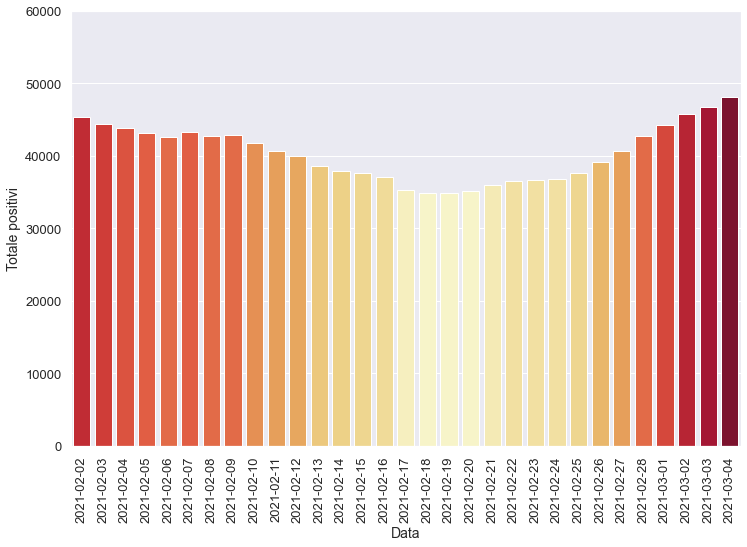

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

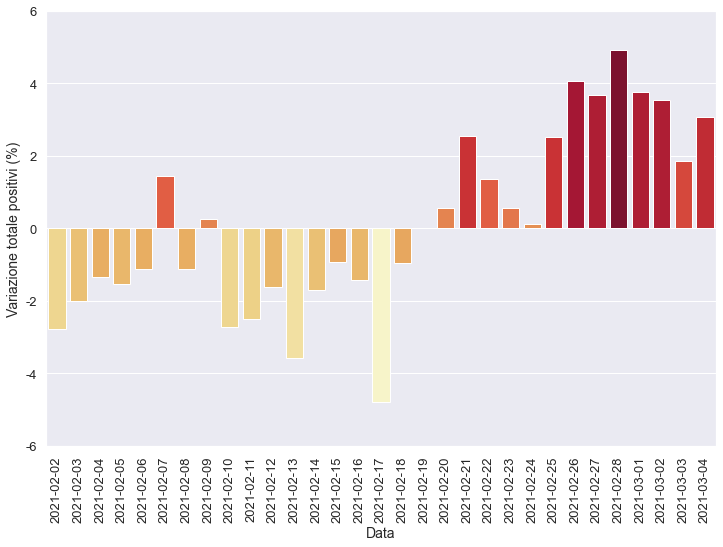

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

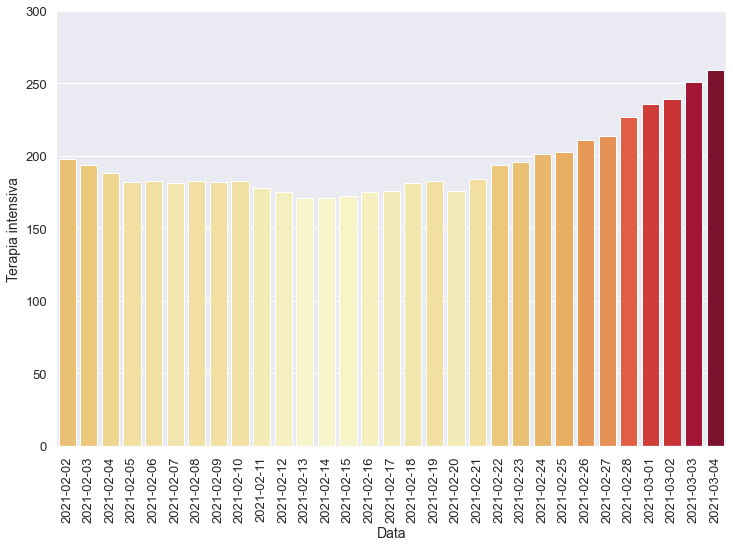

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

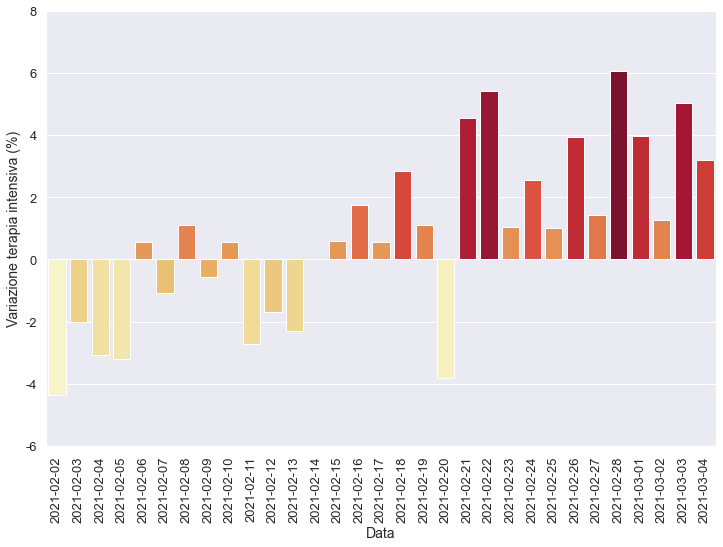

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

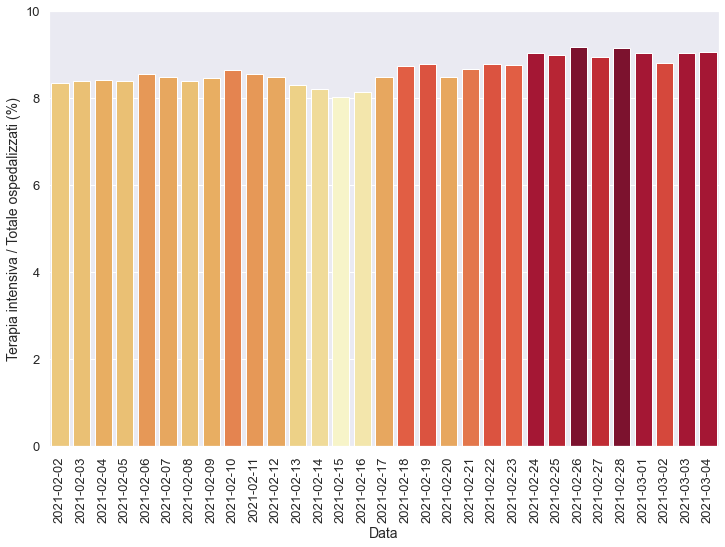

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

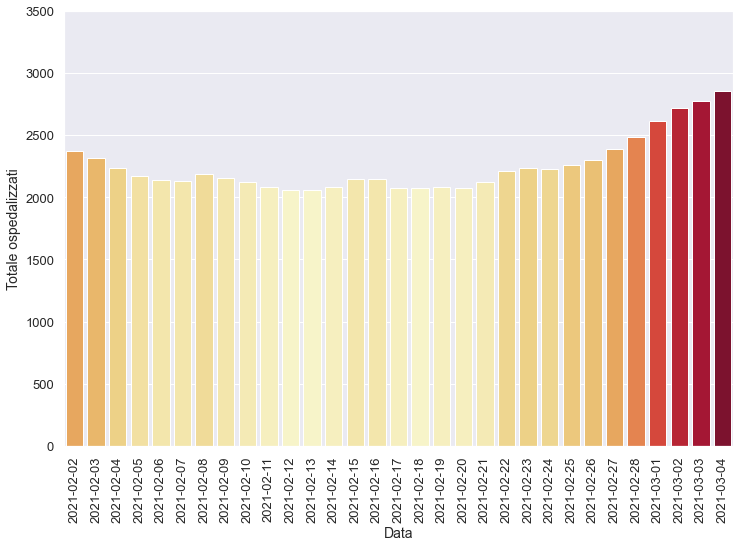

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

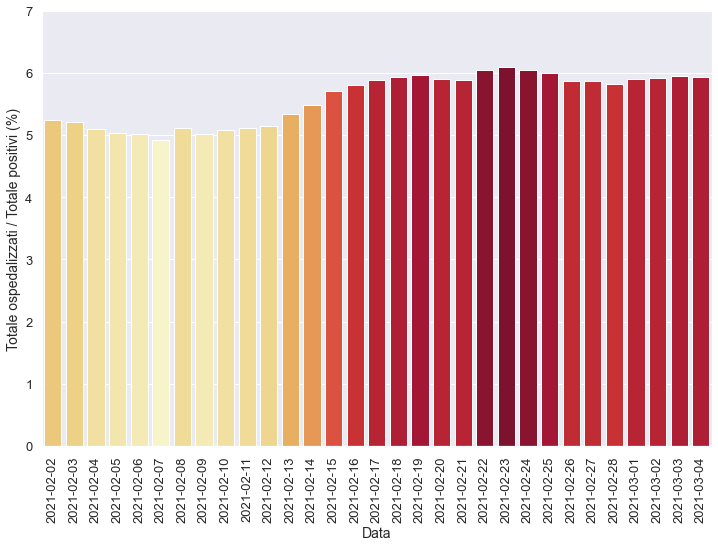

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

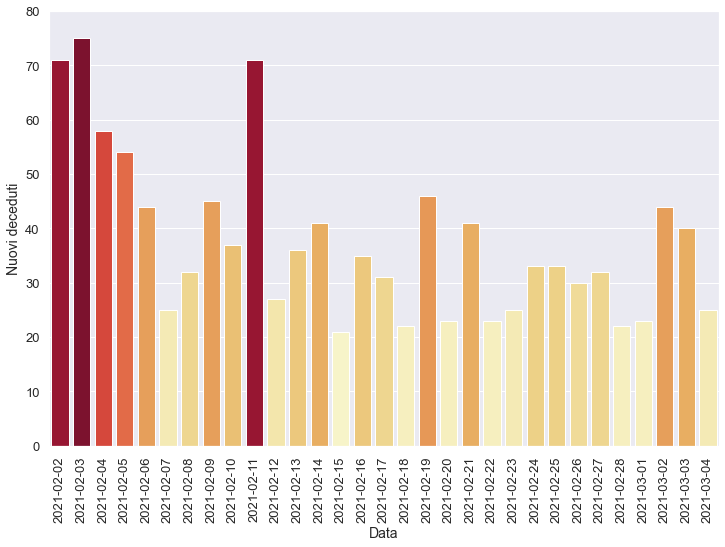

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

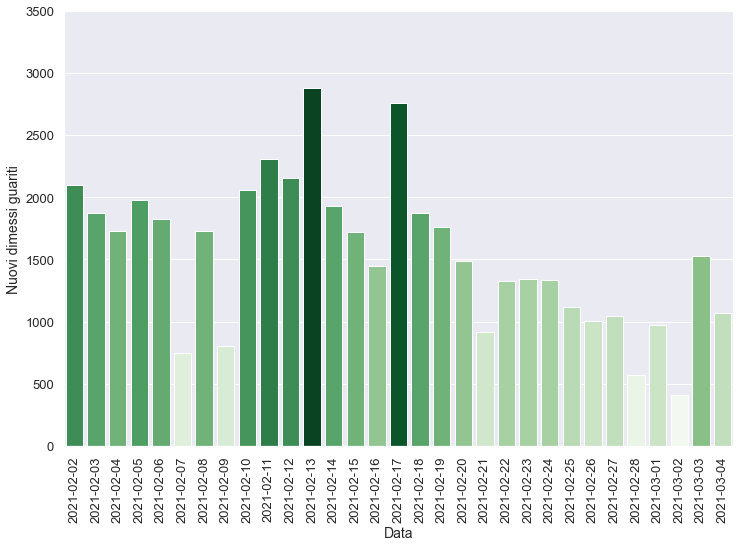

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,8,Emilia-Romagna,2058,203,2261,35432,37693,922,2090,...,33.0,40804.0,7246.0,887.0,8.98,6.00,5.12,28.84,1.00,2.51
1,2021-02-26T17:00:00,8,Emilia-Romagna,2092,211,2303,36919,39222,1529,2575,...,30.0,40148.0,6966.0,1487.0,9.16,5.87,6.41,36.97,3.94,4.06
2,2021-02-27T17:00:00,8,Emilia-Romagna,2178,214,2392,38279,40671,1449,2542,...,32.0,32129.0,7640.0,1360.0,8.95,5.88,7.91,33.27,1.42,3.69
3,2021-02-28T17:00:00,8,Emilia-Romagna,2255,227,2482,40196,42678,2007,2610,...,22.0,24606.0,7404.0,1917.0,9.15,5.82,10.61,35.25,6.07,4.93
4,2021-03-01T17:00:00,8,Emilia-Romagna,2375,236,2611,41667,44278,1600,2597,...,23.0,12463.0,3788.0,1471.0,9.04,5.90,20.84,68.56,3.96,3.75
5,2021-03-02T17:00:00,8,Emilia-Romagna,2476,239,2715,43132,45847,1569,2040,...,44.0,40971.0,5741.0,1465.0,8.80,5.92,4.98,35.53,1.27,3.54
6,2021-03-03T17:00:00,8,Emilia-Romagna,2528,251,2779,43919,46698,851,2456,...,40.0,40815.0,7352.0,787.0,9.03,5.95,6.02,33.41,5.02,1.86
7,2021-03-04T17:00:00,8,Emilia-Romagna,2600,259,2859,45269,48128,1430,2545,...,25.0,38231.0,8388.0,1350.0,9.06,5.94,6.66,30.34,3.19,3.06


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

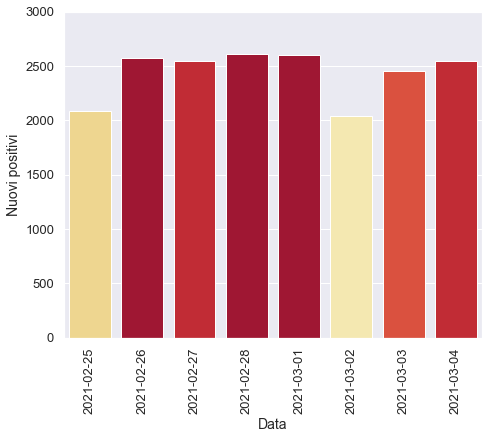

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

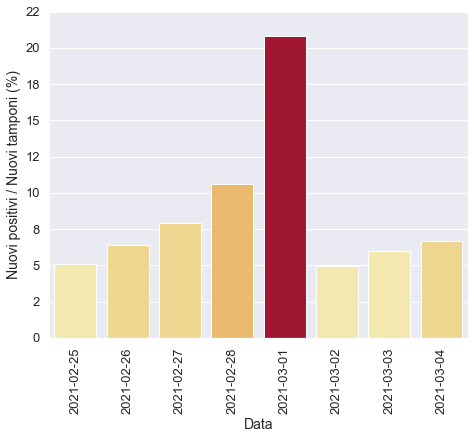

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

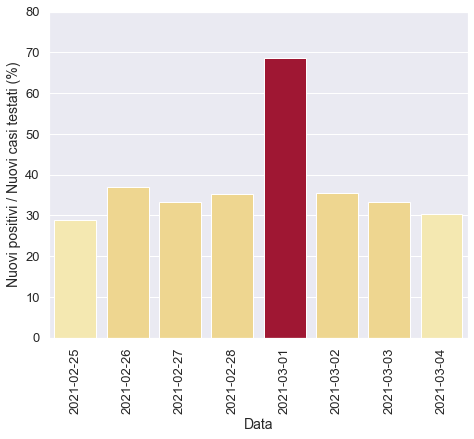

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

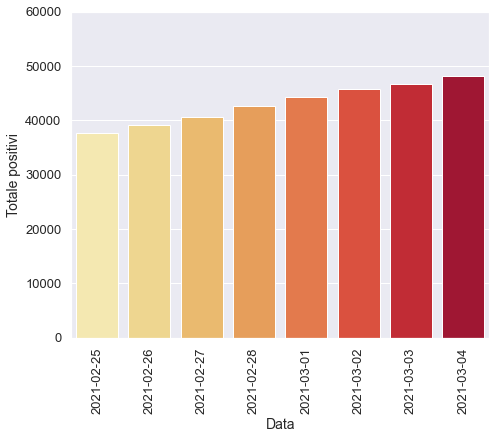

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

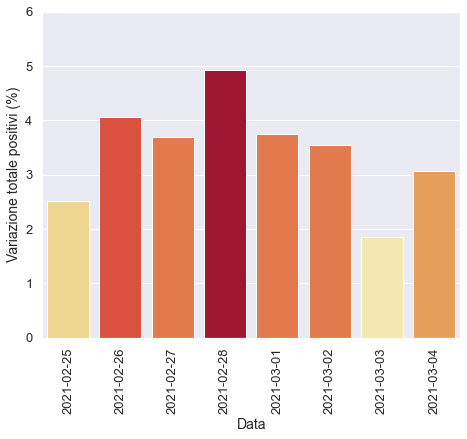

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

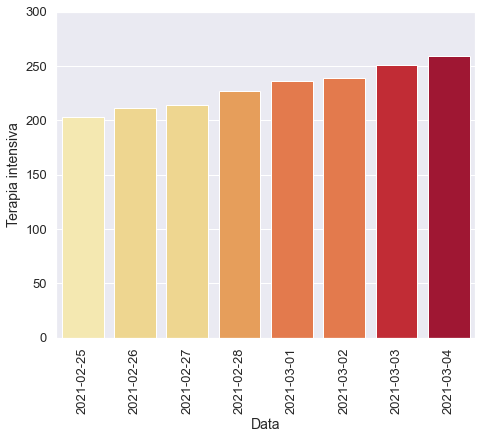

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

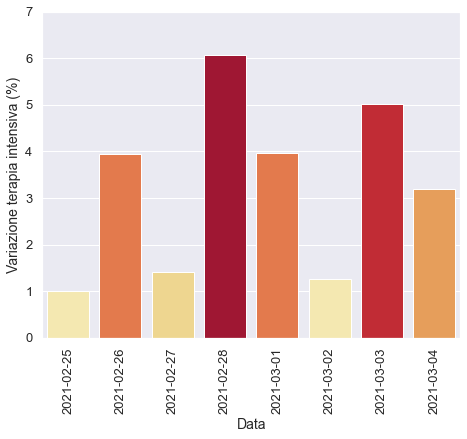

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

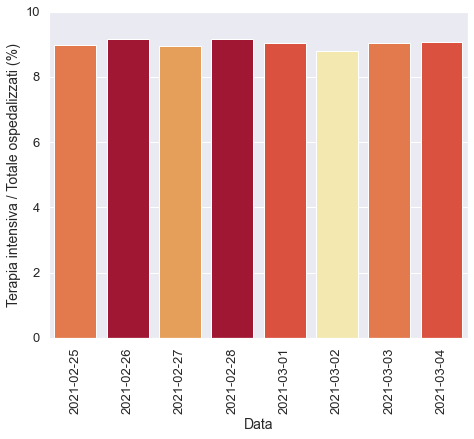

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

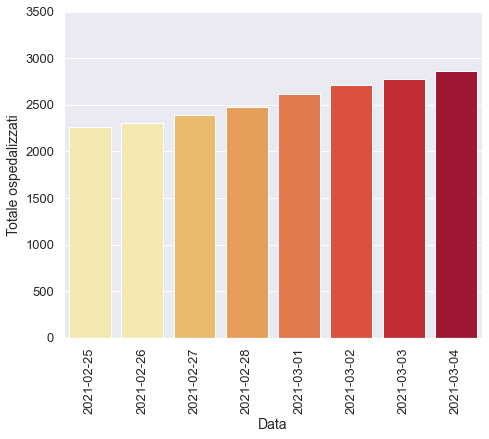

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

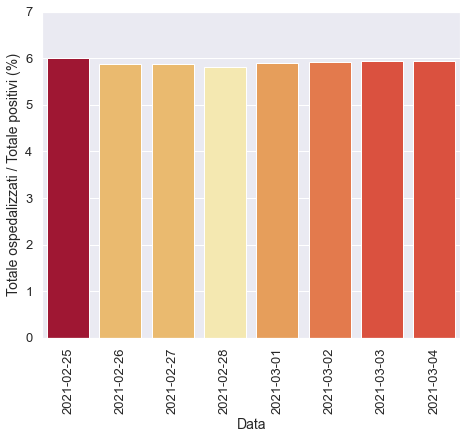

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

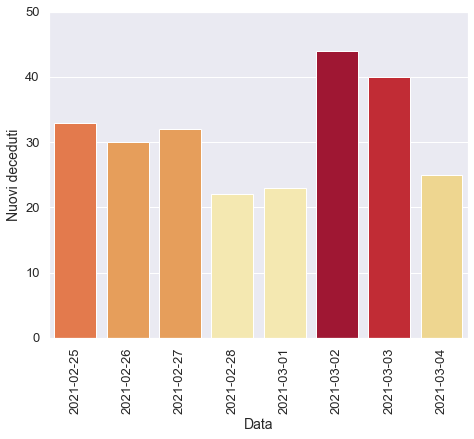

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

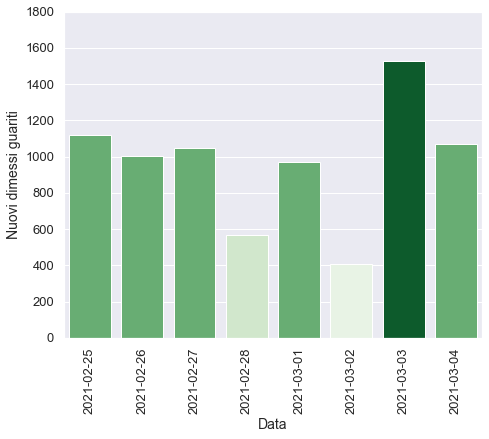

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)